In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32') / 255.0  # Normalize between 0 and 1
y = mnist.target.astype(int)  # Convert target to integer

print(f"Shape of dataset: {X.shape}")


Shape of dataset: (70000, 784)


In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Train the Isolation Forest model
iso_forest.fit(X_scaled)


IsolationForest(contamination=0.1, random_state=42)

In [5]:
# Predict anomalies (-1 for anomaly, 1 for normal)
predictions = iso_forest.predict(X_scaled)

# Map the predictions to binary (1 = normal, 0 = anomaly)
predictions_binary = np.where(predictions == 1, 0, 1)  # 0 for normal, 1 for anomalies


Accuracy of Isolation Forest: 0.13


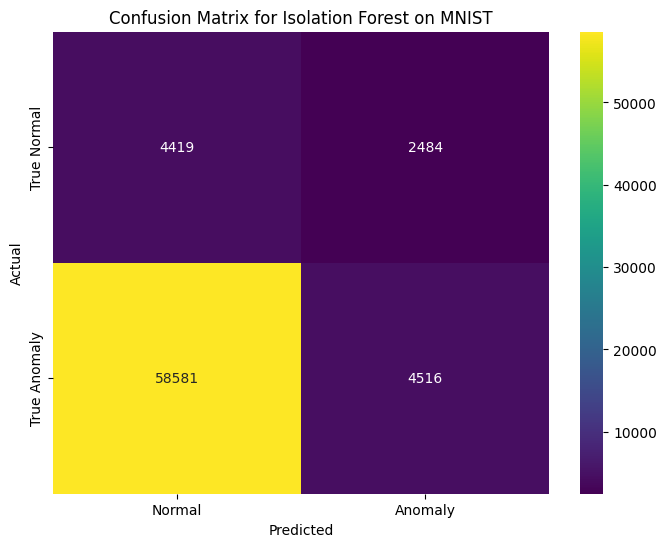

In [6]:
# Assume digit '0' is the normal class, everything else is treated as an anomaly
y_true = np.where(y == 0, 0, 1)  # 0 for normal (digit 0), 1 for anomalies

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_true, predictions_binary)
print(f"Accuracy of Isolation Forest: {accuracy:.2f}")

# Confusion matrix to analyze the performance
conf_mat = confusion_matrix(y_true, predictions_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=['Normal', 'Anomaly'], yticklabels=['True Normal', 'True Anomaly'])
plt.title('Confusion Matrix for Isolation Forest on MNIST')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


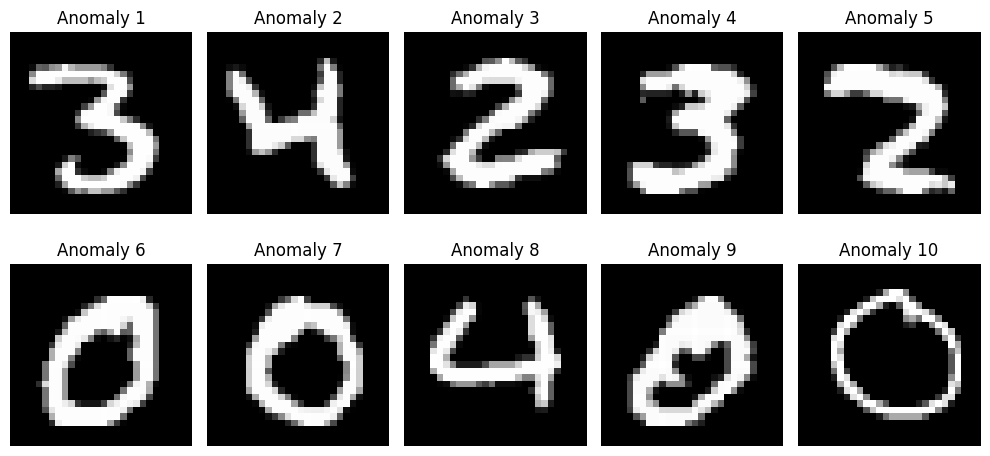

In [8]:
# Get the indices of the anomalies
anomaly_indices = np.where(predictions == -1)[0]

# Convert X to a NumPy array if it's still a DataFrame
X_np = X.to_numpy()  # Ensure it's a NumPy array

# Visualize the first 10 anomalies
plt.figure(figsize=(10, 5))
for i, idx in enumerate(anomaly_indices[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_np[idx].reshape(28, 28), cmap='gray')  # Use X_np instead of X
    plt.title(f"Anomaly {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()